# Exploring Data

### Questions for Deliverable 1

* How do areas with poor air quality compare to areas with better air quality based on different demographic characteristics, specifically:
    * Race/ethnicity (ACS)?
    * Area median income/ income
    * Housing density 
    * Population density
    * Social vulnerability 
* What is the relationship between health data and What are the trends in yearly change in air quality for Boston residents  by neighborhood, zip code.

### General steps
* Get the data from the APIs (in slack channel)
* Explore data in the existing CSVs and the data secured through the APIs provided.
* identify whch dataset(s) to use for each question
* Analyse question specific data to answer the two base questions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

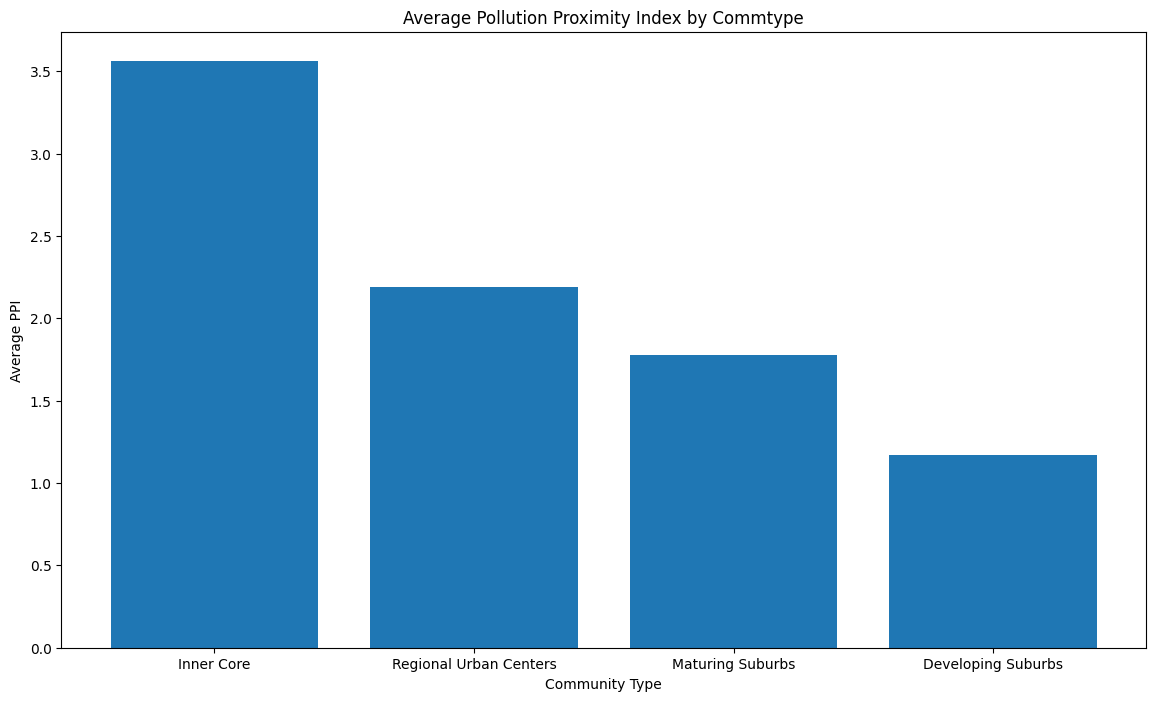

In [9]:
ppi = pd.read_csv('../data/csv_files/pollution_proximity_intensity.csv')

ppi.columns

ppi_filtered = ppi[['commtypid','commtype','ppi5','nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']]

ppi_by_commtype = (ppi_filtered.groupby(['commtypid','commtype']).mean().reset_index())

ppi_by_commtype.iloc[0,1] = "Unknown"

ppi_by_commtype = ppi_by_commtype.loc[ppi_by_commtype["commtype"]!="Unknown"]

plt.figure(figsize=(14,8))
plt.bar(ppi_by_commtype["commtype"], ppi_by_commtype["ppi5"])
plt.xlabel("Community Type")
plt.ylabel("Average PPI")
plt.title("Average Pollution Proximity Index by Comunity type")
plt.show()

/var/folders/dr/5fwr6gys3_q2mlm3nwj706880000gn/T/ipykernel_55163/1586148944.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = ppi_filtered.groupby('bin')['ppi5'].mean()


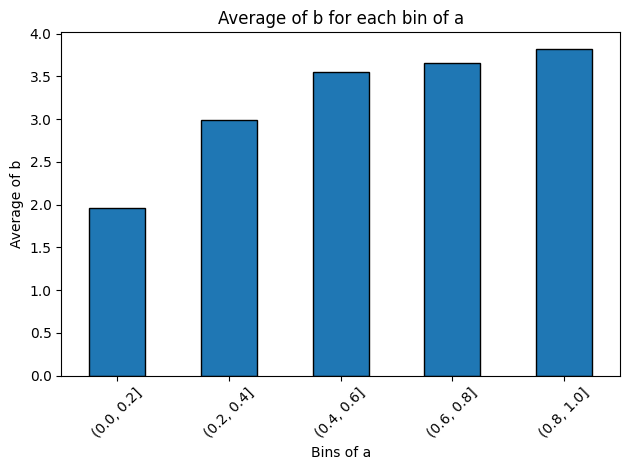

In [17]:
ppi_filtered["minorities"] = (ppi_filtered["nhaa_10"]+ppi_filtered["nhapi_10"]+ppi_filtered["lat_10"]+ppi_filtered["nhoth_10"])/ \
                            (ppi_filtered["nhwhi_10"]+ppi_filtered["nhaa_10"]+ppi_filtered["nhapi_10"]+ppi_filtered["lat_10"]+ppi_filtered["nhoth_10"])

bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

ppi_filtered["bin"] = pd.cut(ppi_filtered["minorities"], bins=bins)

binned_avg = ppi_filtered.groupby('bin')['ppi5'].mean()

binned_avg.plot(kind='bar', edgecolor='black')
plt.title('Average of b for each bin of a')
plt.xlabel('Bins of a')
plt.ylabel('Average of b')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                 commtype       nhwhi_10        nhaa_10       nhapi_10  \
1      Developing Suburbs  305149.103573    4152.380493    9487.069729   
2              Inner Core  816072.510627  188259.690299  133309.758504   
3        Maturing Suburbs  769820.087461   33514.387129   53319.198771   
4  Regional Urban Centers  392074.962730   24996.201690   42551.976687   

          lat_10      nhoth_10  
1    7516.950212   5437.780988  
2  194533.045727  54252.888260  
3   24146.298000  18846.374567  
4   62523.262310  20770.063762  


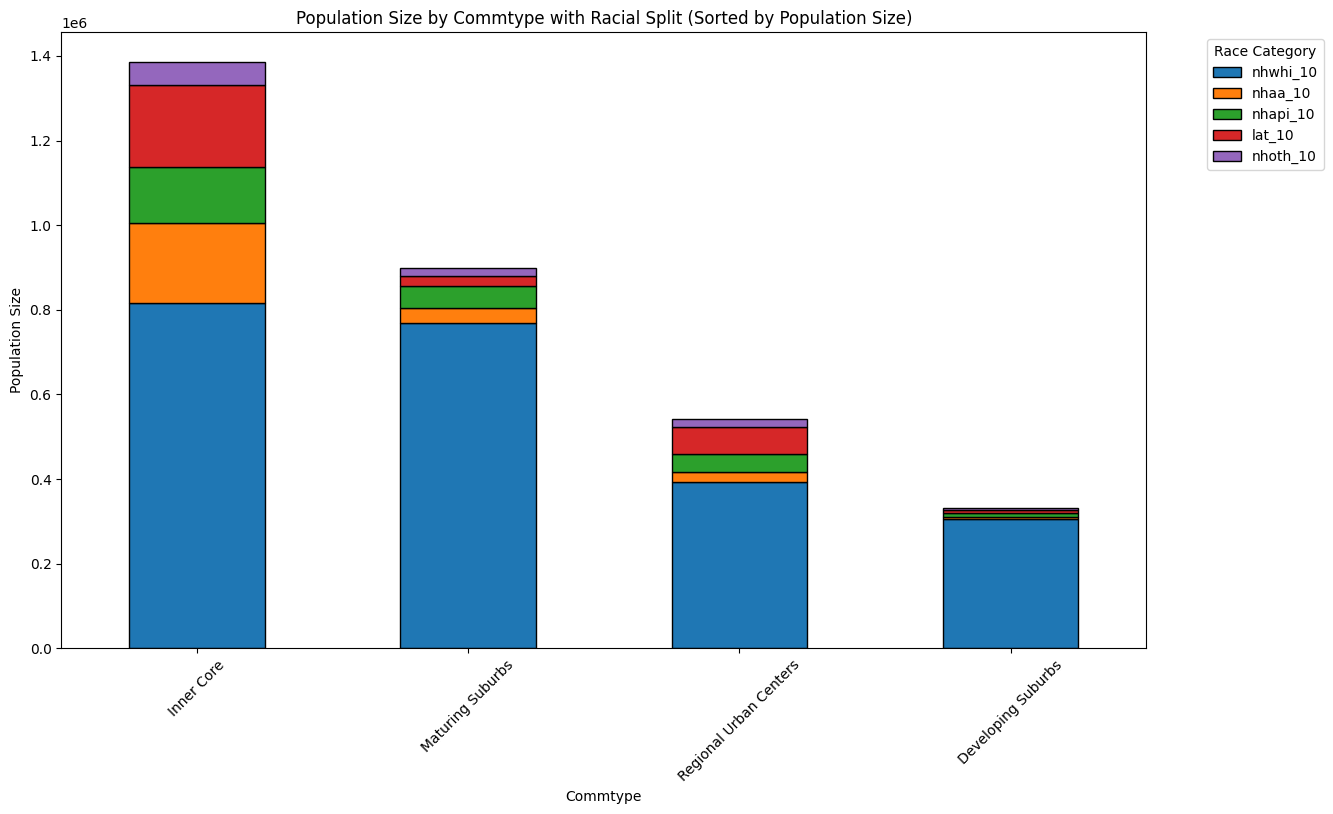

In [20]:
# Load the data
ppi = pd.read_csv('../data/csv_files/pollution_proximity_intensity.csv')

# Select the relevant columns for population and race
race_columns = ['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']
pop_columns = ['commtype'] + race_columns
ppi_pop = ppi[pop_columns]

# Sum the population within each race category for each commtype
pop_by_race = ppi_pop.groupby('commtype').sum().reset_index()
pop_by_race = pop_by_race.drop(0)
print(pop_by_race)
# Sort the DataFrame by total population size in descending order
pop_by_race = pop_by_race.sort_values(by=race_columns, ascending=False)

# Set the 'commtype' as the x-axis and plot a stacked bar chart for population by race
ax = pop_by_race.set_index('commtype')[race_columns].plot(kind='bar', stacked=True, figsize=(14, 8),
                                                         edgecolor='black')  # Add edgecolor attribute
plt.xticks(rotation=45, fontsize=10)
plt.xlabel("Commtype")
plt.ylabel("Population Size")
plt.title("Population Size by Commtype with Racial Split (Sorted by Population Size)")
plt.legend(title='Race Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()